In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


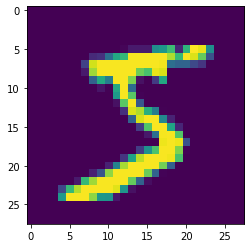

In [9]:
plt.imshow(X_train[0])

In [10]:
y_train[0]

5

# Flatten the 2d image

In [11]:
X_train = X_train.reshape(len(X_train),28 * 28)


In [14]:
X_test = X_test.reshape(len(X_test),28*28)

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.4710 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9252


In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 787us/step - loss: 0.2651 - accuracy: 0.9266


[0.265140175819397, 0.9265999794006348]

accuracy is 92.6

lets try an example

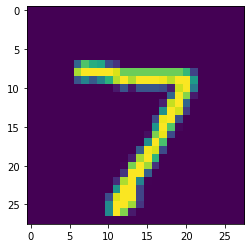

In [32]:
img = X_test[0] * 255
img_2d = img.reshape(28,28)
plt.imshow(img)

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred[0]

array([2.69803107e-02, 1.72079424e-07, 5.04185855e-02, 9.49616432e-01,
       1.74975395e-03, 1.17535084e-01, 1.01479088e-06, 9.99786794e-01,
       6.20887578e-02, 6.08529806e-01], dtype=float32)

In [38]:
np.argmax(y_pred[0])

7

as we can we, the program predicted that the above image has 7 written in it.

# confussion matirx

In [39]:
y_pred_val = [np.argmax(i) for i in y_pred]

In [41]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred_val)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    2,    1,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  927,   18,    8,    3,   13,   10,   34,    4],
       [   2,    0,   18,  931,    0,   18,    2,   11,   19,    9],
       [   1,    1,    6,    2,  904,    0,   12,    4,   10,   42],
       [  10,    2,    4,   36,    7,  770,   19,    5,   31,    8],
       [  11,    3,    7,    1,    7,   10,  916,    2,    1,    0],
       [   1,    5,   23,    5,    5,    1,    0,  956,    2,   30],
       [  10,    7,    7,   21,    9,   24,   10,   13,  868,    5],
       [  11,    7,    1,    9,   25,    7,    0,   23,    5,  921]])>

Text(69.0, 0.5, 'Truth')

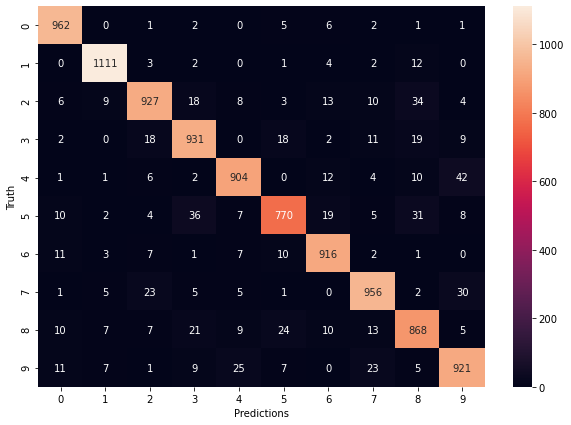

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt= 'd')
plt.xlabel('Predictions')
plt.ylabel("Truth")